imports done!


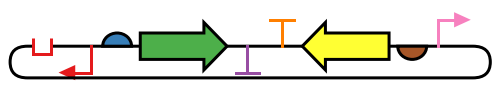

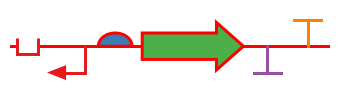

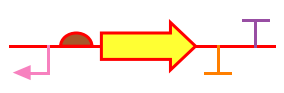

d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: get_species is not defined for component pconst, None returned.
  pywarn(txt)
d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: get_species is not defined for component UTR1, None returned.
  pywarn(txt)
d:\documents\github\biocrnpyler\biocrnpyler\component.py:11: UserWarning: get_species is not defined for component plac, None returned.
  pywarn(txt)


In [5]:
from biocrnpyler import *
#import biocrnpyler.integrases as integ
import numpy as np
import dnaplotlib as dpl
%matplotlib inline
print("imports done!")

ptet = RegulatedPromoter("ptet",["tetr"],leak=True)
pAND = CombinatorialPromoter("pAND",["tetr","laci"],tx_capable_list=[["tetr","laci"]],leak=False)
plac = RegulatedPromoter("plac",["laci"],leak=True)
pconst = Promoter("pconst")
attB = AttachmentSite("attB","attB",integrase="Bxb1")
attP = AttachmentSite("attP","attP",integrase="Bxb1")
attL = AttachmentSite("attL","attL",integrase="Bxb1")
attR = AttachmentSite("attR","attR",integrase="Bxb1")
utr1 = RBS("UTR1")
utr2 = RBS("UTR2")
gfp = CDS("GFP","GFP")
fusrfp = CDS("fusRFP","RFP",no_stop_codons=["forward"])
rfp = CDS("RFP","RFP")
yfp = CDS("YFP","YFP")
t16 = Terminator("t16")




test_constructs = []
#test_constructs += [DNA_construct([[t16,"reverse"],[gfp,"reverse"],[utr1,"reverse"],[attB,"forward"],[plac,"forward"],[attP,"reverse"],[t16,"forward"]],circular=True)]
test_constructs += [DNA_construct([[plac,"reverse"],[utr1,"forward"],[gfp,"forward"],[t16,"reverse"],[t16,"forward"],[rfp,"reverse"],[utr1,"reverse"],[pconst,"forward"]],circular=True)]
#test_constructs += [DNA_construct([[t16,"reverse"],[gfp,"reverse"],[utr1,"reverse"],[attL,"forward"],[plac,"reverse"],[attR,"reverse"],[t16,"forward"]],circular=True)]

for construct in test_constructs:
    plotConstruct(construct,debug=False,plot_rnas=True)

integrated = []

allconstructs = test_constructs+integrated

parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components3 = [Protein("laci"),Protein("tetr")]+allconstructs
myMixture3 = TxTlExtract(name = "txtl", parameters = parameters, components = components3, parameter_warnings = False)
myCRN3 = myMixture3.compile_crn()

In [6]:
from bokeh.models import (Plot , Range1d)
import bokeh.plotting
import bokeh.io
bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
colordict={"complex":"cyan","protein":"green",
            "GFP":"lightgreen",
            "RFP":"red",
            "ribosome":"blue",
            "dna":"grey","rna":"orange",
            "ligand":"pink","phosphate":"yellow","nothing":"purple"}
layout_str = "force"
#print("one construct")
DG, DGspec, DGrxn = generate_networkx_graph(myCRN3,use_pretty_print=True,colordict=colordict) #this creates the networkx objects
plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a 
graphPlot(DG,DGspec,DGrxn,plot,layout=layout_str,posscale=1) #now you draw the network on the plot. Layout "force" is 
bokeh.io.show(plot) #if you don't type this the plot won't show

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\models\graphs.py:164: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "
